In [1]:
import pandas as pd 
import datetime as dt
from datetime import datetime
import numpy as np
import matplotlib
import seaborn as sns

df = pd.read_csv("PHILADELPHIA FVE 20210208.txt", sep='\t', header=None) 
demo_df = pd.read_csv("ACSST5Y2019.S0601_data_with_overlays_2021-04-06T003209.csv") 
income_df = pd.read_csv("ACSST5Y2019.S1901_data_with_overlays_2021-04-06T003209.csv")
cols = pd.read_csv("Field Names.txt", sep='\t') 
election_map = pd.read_csv("PHILADELPHIA Election Map 20210208.txt", sep='\t', header=None) 

c:\users\sidj2\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,12,19,21,24,29,43,44,45,70,71,72,73,76,77,78,79,80,81,82,83,84,85,86,87,88,89,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
headers = cols['Field Description'].tolist()
df.columns = headers

In [3]:
election_map.columns = ['County', 'Election Number', 'Election', 'Election Date']
for index, row in election_map.iterrows():
    col_name = 'Election ' + str(row['Election Number']) + ' Party'
    new_name = row['Election']
    df.rename({col_name : new_name}, axis=1, inplace=True)

In [4]:
df.drop(columns=['Title', 'First Name', 'Middle Name', 'Suffix'], inplace=True)
df['Address'] = df['House Number'].astype(str) + ' ' + df['Street Name']

In [5]:
penn_addresses = ['3941 IRVING ST', '3900 WALNUT ST',  '3820 LOCUST WALK', '3910 IRVING ST', '3333 WALNUT ST',
                  '3565 SANSOM ST', '3335 WOODLAND WALK', '3817 SPRUCE ST', '3700 SPRUCE ST', '3901 LOCUST WALK',
                  '3715 WOODLAND WALK', '3909 SPRUCE ST', '3650 SPRUCE ST', '310 S 36TH ST', '3925 WALNUT ST',
                  '3820 LOCUST WK', '3465 SANSOM ST', '3901 LOCUST WK', '101 S 39TH ST', '3901 LOCUST ST',
                  '3411 CHESTNUT ST', '3900 CHESTNUT ST', '3737 CHESTNUT ST', '3702 SPRUCE ST', '3945 CHESTNUT ST']
penn_add_voters = df[df['Address'].isin(penn_addresses)]
penn_add_voters['School'] = 'University of Pennsylvania'

drexel_addresses = ['3301 ARCH ST', '115 N 32ND ST',  '203 N 34TH ST', '223 N 34TH ST', '3301 RACE ST',
                    '3200 RACE ST', '3300 RACE ST', '325 N 15TH ST', '101 N 34TH ST', '3320 POWELTON AVE',
                    '3200 CHESTNUT ST']
drexel_voters = df[df['Address'].isin(drexel_addresses)]
drexel_voters['School'] = 'Drexel University'

temple_addresses = ['2029 N BROAD ST', '1601 N BROAD ST',  '1603 N BROAD ST', '2108 N BROAD ST', '1940 LIACOURAS WALK',
                    '1300 CECIL B MOORE AVE', '1200 CECIL B MOORE AVE', '1250 CECIL B MOORE AVE', 
                    '1520 CECIL B MOORE AVE', '801 N CHERRY ST']
temple_voters = df[df['Address'].isin(temple_addresses)]
temple_voters['School'] = 'Temple University'

tju_addresses = ['950 WALNUT ST', '1000 WALNUT ST',  '1603 N BROAD ST', '201 S 11TH ST']
tju_voters = df[df['Address'].isin(tju_addresses)]
tju_voters['School'] = 'Thomas Jefferson University'

usciences_addresses = ['734 S 42ND ST', '1000 WALNUT ST',  '510 S 42ND ST']
usciences_voters = df[df['Address'].isin(usciences_addresses)]
usciences_voters['School'] = 'University of the Sciences'

<ipython-input-5-2eb70304d414>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penn_add_voters['School'] = 'University of Pennsylvania'
<ipython-input-5-2eb70304d414>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drexel_voters['School'] = 'Drexel University'
<ipython-input-5-2eb70304d414>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [6]:
student_add_voters = pd.DataFrame().append([penn_add_voters, drexel_voters, temple_voters, tju_voters, usciences_voters])
student_add_voters.dropna(axis=1, how='all', inplace=True)

In [7]:
for index, row in election_map.iterrows():
    col_name = 'Election ' + str(row['Election Number']) + ' Vote Method'
    new_name = row['Election Date']
    student_add_voters.rename({col_name : new_name}, axis=1, inplace=True)

In [8]:
student_add_voters['DOB'] = pd.to_datetime(student_add_voters['DOB'])
voters15 = student_add_voters[((dt.datetime.strptime('11/03/2015', '%d/%m/%Y') - student_add_voters['DOB']).dt.days/365 <= 24)
                              & ((dt.datetime.strptime('11/03/2015', '%d/%m/%Y') - student_add_voters['DOB']).dt.days/365 >= 18)]
voters16 = student_add_voters[((dt.datetime.strptime('11/08/2016', '%d/%m/%Y') - student_add_voters['DOB']).dt.days/365 <= 24)
                              & ((dt.datetime.strptime('11/08/2016', '%d/%m/%Y') - student_add_voters['DOB']).dt.days/365 >= 18)]
voters17 = student_add_voters[((dt.datetime.strptime('11/07/2017', '%d/%m/%Y') - student_add_voters['DOB']).dt.days/365 <= 24)
                              & ((dt.datetime.strptime('11/07/2017', '%d/%m/%Y') - student_add_voters['DOB']).dt.days/365 >= 18)]
voters18 = student_add_voters[((dt.datetime.strptime('11/06/2018', '%d/%m/%Y') - student_add_voters['DOB']).dt.days/365 <= 24)
                              & ((dt.datetime.strptime('11/06/2018', '%d/%m/%Y') - student_add_voters['DOB']).dt.days/365 >= 18)]
voters19 = student_add_voters[((dt.datetime.strptime('11/05/2019', '%d/%m/%Y') - student_add_voters['DOB']).dt.days/365 <= 24)
                              & ((dt.datetime.strptime('11/05/2019', '%d/%m/%Y') - student_add_voters['DOB']).dt.days/365 >= 18)]
voters20 = student_add_voters[((dt.datetime.strptime('11/03/2020', '%d/%m/%Y') - student_add_voters['DOB']).dt.days/365 <= 24)
                              & ((dt.datetime.strptime('11/03/2020', '%d/%m/%Y') - student_add_voters['DOB']).dt.days/365 >= 18)]

In [9]:
voters20 = voters20[['ID Number', 'Last Name', 'Gender', 'DOB', 'Registration Date', 'Voter Status',
                     'Status Change Date', 'Party Code', 'Address', 'Zip', 'Last Vote Date', 'Precinct Code',
                     'School', '04/26/2016', '2016 GENERAL PRIMARY', '11/08/2016', '2016 GENERAL ELECTION',
                     '05/16/2017', '2017 MUNICIPAL PRIMARY', '11/07/2017', '2017 MUNICIPAL ELECTION',
                     '05/15/2018', '2018 GENERAL PRIMARY', '11/06/2018', '2018 GENERAL ELECTION',
                     '05/21/2019', '2019 MUNICIPAL PRIMARY', '11/05/2019', '2019 MUNICIPAL ELECTION',
                     '06/02/2020', '2020 GENERAL PRIMARY', '11/03/2020', '2020 GENERAL ELECTION']]
voters19 = voters19[['ID Number', 'Last Name', 'Gender', 'DOB', 'Registration Date', 'Voter Status',
                     'Status Change Date', 'Party Code', 'Address', 'Zip', 'Last Vote Date', 'Precinct Code',
                     'School', '04/26/2016', '2016 GENERAL PRIMARY', '11/08/2016', '2016 GENERAL ELECTION',
                     '05/16/2017', '2017 MUNICIPAL PRIMARY', '11/07/2017', '2017 MUNICIPAL ELECTION',
                     '05/15/2018', '2018 GENERAL PRIMARY', '11/06/2018', '2018 GENERAL ELECTION',
                     '05/21/2019', '2019 MUNICIPAL PRIMARY', '11/05/2019', '2019 MUNICIPAL ELECTION',
                     '06/02/2020', '2020 GENERAL PRIMARY', '11/03/2020', '2020 GENERAL ELECTION']]
voters18 = voters18[['ID Number', 'Last Name', 'Gender', 'DOB', 'Registration Date', 'Voter Status',
                     'Status Change Date', 'Party Code', 'Address', 'Zip', 'Last Vote Date', 'Precinct Code',
                     'School', '04/26/2016', '2016 GENERAL PRIMARY', '11/08/2016', '2016 GENERAL ELECTION',
                     '05/16/2017', '2017 MUNICIPAL PRIMARY', '11/07/2017', '2017 MUNICIPAL ELECTION',
                     '05/15/2018', '2018 GENERAL PRIMARY', '11/06/2018', '2018 GENERAL ELECTION',
                     '05/21/2019', '2019 MUNICIPAL PRIMARY', '11/05/2019', '2019 MUNICIPAL ELECTION',
                     '06/02/2020', '2020 GENERAL PRIMARY', '11/03/2020', '2020 GENERAL ELECTION']]
voters17 = voters17[['ID Number', 'Last Name', 'Gender', 'DOB', 'Registration Date', 'Voter Status',
                     'Status Change Date', 'Party Code', 'Address', 'Zip', 'Last Vote Date', 'Precinct Code',
                     'School', '04/26/2016', '2016 GENERAL PRIMARY', '11/08/2016', '2016 GENERAL ELECTION',
                     '05/16/2017', '2017 MUNICIPAL PRIMARY', '11/07/2017', '2017 MUNICIPAL ELECTION',
                     '05/15/2018', '2018 GENERAL PRIMARY', '11/06/2018', '2018 GENERAL ELECTION',
                     '05/21/2019', '2019 MUNICIPAL PRIMARY', '11/05/2019', '2019 MUNICIPAL ELECTION',
                     '06/02/2020', '2020 GENERAL PRIMARY', '11/03/2020', '2020 GENERAL ELECTION']]
voters16 = voters16[['ID Number', 'Last Name', 'Gender', 'DOB', 'Registration Date', 'Voter Status',
                     'Status Change Date', 'Party Code', 'Address', 'Zip', 'Last Vote Date', 'Precinct Code',
                     'School', '04/26/2016', '2016 GENERAL PRIMARY', '11/08/2016', '2016 GENERAL ELECTION',
                     '05/16/2017', '2017 MUNICIPAL PRIMARY', '11/07/2017', '2017 MUNICIPAL ELECTION',
                     '05/15/2018', '2018 GENERAL PRIMARY', '11/06/2018', '2018 GENERAL ELECTION',
                     '05/21/2019', '2019 MUNICIPAL PRIMARY', '11/05/2019', '2019 MUNICIPAL ELECTION',
                     '06/02/2020', '2020 GENERAL PRIMARY', '11/03/2020', '2020 GENERAL ELECTION']]

In [10]:
student_voters = pd.concat([voters16, voters17, voters18, 
                                voters19, voters20]).drop_duplicates().reset_index(drop=True)

In [11]:
student_voters['ID Number'].count()

8095

In [12]:
penn_tracts = ['Census Tract 87.02, Philadelphia County, Pennsylvania',
               'Census Tract 88.02, Philadelphia County, Pennsylvania',
               'Census Tract 88.01, Philadelphia County, Pennsylvania',
               'Census Tract 369, Philadelphia County, Pennsylvania']
drexel_tracts = ['Census Tract 90, Philadelphia County, Pennsylvania']
temple_tracts = ['Census Tract 153, Philadelphia County, Pennsylvania',
                 'Census Tract 147, Philadelphia County, Pennsylvania',
                 'Census Tract 146, Philadelphia County, Pennsylvania',
                 'Census Tract 377, Philadelphia County, Pennsylvania']
tju_tracts = ['Census Tract 9.02, Philadelphia County, Pennsylvania']
usciences_tracts = ['Census Tract 77, Philadelphia County, Pennsylvania']

In [13]:
relevant_cols = ['GEO_ID', 'NAME', 'S0601_C01_001E', 'S0601_C01_004E',
                 'S0601_C01_014E', 'S0601_C01_015E', 'S0601_C01_017E', 'S0601_C01_021E', 
                 'S0601_C01_047E']
demo_df = demo_df[relevant_cols]
col_names = ['ID', 'Tract', 'Total Population', '18-24 Population', 'White Population', 
             'Black Population', 'Asian Population', 'Hispanic Population', 'Median Income']
demo_df.columns = col_names
demo_df = demo_df.drop(0, axis=0)

In [14]:
relevant_cols2 = ['GEO_ID', 'S1901_C01_013E']
income_df = income_df[relevant_cols2]

col_names2 = ['ID', 'Mean Income']
income_df.columns = col_names2
income_df = income_df.drop(0, axis=0)

In [15]:
acs_df = demo_df.merge(income_df, how='left', on='ID')
acs_df['Total Population'] = acs_df['Total Population'].astype(int)

In [16]:
acs_df['18-24 Population'] = pd.to_numeric(acs_df['18-24 Population'])
acs_df['White Population'] = pd.to_numeric(acs_df['White Population'])
acs_df['Black Population'] = pd.to_numeric(acs_df['Black Population'])
acs_df['Asian Population'] = pd.to_numeric(acs_df['Asian Population'])
acs_df['Hispanic Population'] = pd.to_numeric(acs_df['Hispanic Population'])
acs_df['Median Income'] = pd.to_numeric(acs_df['Median Income'])
acs_df['Mean Income'] = pd.to_numeric(acs_df['Mean Income'])

In [17]:
census9_02 = ['950 WALNUT ST', '1000 WALNUT ST',  '1603 N BROAD ST', '201 S 11TH ST']
census77 = ['734 S 42ND ST', '1000 WALNUT ST',  '510 S 42ND ST']
census88_02 = ['3941 IRVING ST', '3900 WALNUT ST', '3901 LOCUST WALK', '3909 SPRUCE ST', '3925 WALNUT ST', 
               '3901 LOCUST ST', '3900 CHESTNUT ST', '3945 CHESTNUT ST', '3901 LOCUST WK']
census88_01 = ['3820 LOCUST WALK', '3910 IRVING ST', '3817 SPRUCE ST', '3820 LOCUST WK', '101 S 39TH ST', 
               '3737 CHESTNUT ST']
census90 = ['3301 ARCH ST', '115 N 32ND ST', '203 N 34TH ST', '223 N 34TH ST', '3301 RACE ST', 
            '3200 RACE ST', '3300 RACE ST', '101 N 34TH ST', '3320 POWELTON AVE']
census146 = ['1601 N BROAD ST', '1603 N BROAD ST', '1300 CECIL B MOORE AVE', '1200 CECIL B MOORE AVE', 
             '1250 CECIL B MOORE AVE']
census147 = ['1520 CECIL B MOORE AVE']
census153 = ['2108 N BROAD ST']
census377 = ['2029 N BROAD ST', '1940 LIACOURAS WALK',]
census369 = ['3700 SPRUCE ST', '3333 WALNUT ST', '3565 SANSOM ST', '3335 WOODLAND WALK', '3715 WOODLAND WALK', 
             '3650 SPRUCE ST', '310 S 36TH ST', '3465 SANSOM ST', '3411 CHESTNUT ST', 
             '3702 SPRUCE ST', '3200 CHESTNUT ST']

In [18]:
def add_vals(index, tract, df, in_df):
    tract_order = ['00902', '07700', '08702', '08801', '08802', '09000', 
                   '14600', '14700', '15300', '36900', '37700']
    geocode = tract_order.index(tract)
    in_df.loc[index, 'White Proportion'] = df.iloc[geocode]['White Population']
    in_df.loc[index, 'Black Proportion'] = df.iloc[geocode]['Black Population']
    in_df.loc[index, 'Asian Proportion'] = df.iloc[geocode]['Asian Population']
    in_df.loc[index, 'Hispanic Proportion'] = df.iloc[geocode]['Hispanic Population']
    in_df.loc[index, 'Median Income'] = df.iloc[geocode]['Median Income']
    in_df.loc[index, 'Mean Income'] = df.iloc[geocode]['Mean Income']

In [19]:
student_voters['White Proportion'] = 0
student_voters['Black Proportion'] = 0
student_voters['Asian Proportion'] = 0
student_voters['Hispanic Proportion'] = 0
student_voters['Median Income'] = 0
student_voters['Mean Income'] = 0

for index, row in student_voters.iterrows():    
    address = row['Address']
    if address in census9_02:
        add_vals(index, '00902', acs_df, student_voters)
    elif address in census77:
        add_vals(index, '07700', acs_df, student_voters)
    elif address in census88_02:
        add_vals(index, '08802', acs_df, student_voters)
    elif address in census88_01:
        add_vals(index, '08801', acs_df, student_voters)
    elif address in census90:
        add_vals(index, '09000', acs_df, student_voters)
    elif address in census146:
        add_vals(index, '14600', acs_df, student_voters)
    elif address in census147:
        add_vals(index, '14700', acs_df, student_voters)
    elif address in census153:
        add_vals(index, '15300', acs_df, student_voters)
    elif address in census377:
        add_vals(index, '37700', acs_df, student_voters)
    elif address in census369:
        add_vals(index, '36900', acs_df, student_voters)
    else:
        continue

In [20]:
def binary_col(election):
    student_voters[election] = student_voters[election].fillna(0)
    student_voters[election][student_voters[election] != 0] = 1

In [21]:
elections = ['2016 GENERAL PRIMARY', '2016 GENERAL ELECTION', '2017 MUNICIPAL PRIMARY', '2017 MUNICIPAL ELECTION',
             '2018 GENERAL PRIMARY', '2018 GENERAL ELECTION', '2019 MUNICIPAL PRIMARY','2019 MUNICIPAL ELECTION', 
             '2020 GENERAL PRIMARY', '2020 GENERAL ELECTION']
for election in elections:
    binary_col(election)

<ipython-input-20-c6139fb019ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_voters[election][student_voters[election] != 0] = 1


In [22]:
data_final = student_voters.filter(['Gender', 'Voter Status', 'Party Code',
                            'Precinct Code', 'School', 'White Proportion', 'Black Proportion',
                            'Asian Proportion', 'Hispanic Proportion', 'Median Income', 'Mean Income',
                            '2016 GENERAL PRIMARY', '2016 GENERAL ELECTION', '2017 MUNICIPAL PRIMARY', 
                            '2017 MUNICIPAL ELECTION', '2018 GENERAL PRIMARY', '2018 GENERAL ELECTION', 
                            '2019 MUNICIPAL PRIMARY','2019 MUNICIPAL ELECTION', 
                            '2020 GENERAL PRIMARY', '2020 GENERAL ELECTION'], axis=1)

In [23]:
categorical = ['School', 'Gender', 'Voter Status', 'Party Code', 'Precinct Code']
for x in categorical:
    list_x = 'x_' + x
    list_x = pd.get_dummies(data_final[x], prefix=x)
    data_final = data_final.join(list_x)

In [24]:
cols = data_final.columns.values.tolist()

final_cols = [c for c in cols if c not in categorical]

data_final = data_final[final_cols]

In [25]:
data_final.head(5)

,White Proportion,Black Proportion,Asian Proportion,Hispanic Proportion,Median Income,Mean Income,2016 GENERAL PRIMARY,2016 GENERAL ELECTION,2017 MUNICIPAL PRIMARY,2017 MUNICIPAL ELECTION,...,Precinct Code_2707,Precinct Code_2711,Precinct Code_2716,Precinct Code_2718,Precinct Code_2719,Precinct Code_2720,Precinct Code_2721,Precinct Code_2722,Precinct Code_3207,Precinct Code_4706
0,57.3,14.3,21.7,6.5,4478,71631,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,57.3,14.3,21.7,6.5,4478,71631,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,57.3,14.3,21.7,6.5,4478,71631,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,50.8,21.9,22.6,9.2,6920,33335,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,51.9,11.9,23.5,11.0,4588,64703,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [26]:
X = data_final.loc[:, data_final.columns != '2020 GENERAL ELECTION']
y = data_final.loc[:, data_final.columns == '2020 GENERAL ELECTION']

y = y.astype(int)

columns = X.columns

X_ = np.array(X)
y_ = np.array(y)

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

sm = SMOTE(sampling_strategy='minority',random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.3, random_state=42)

sm_X,sm_y = sm.fit_resample(X_train, y_train)
sm_X = pd.DataFrame(data=sm_X,columns=columns )
sm_y = pd.DataFrame(data=sm_y,columns=['2020 GENERAL ELECTION'])

cols = sm_X.columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sm_X = scaler.fit_transform(sm_X)
X_test = scaler.transform(X_test)

sm_X = pd.DataFrame(data=sm_X,columns=cols)
X_test = pd.DataFrame(data=X_test,columns=cols)

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(solver = 'lbfgs', max_iter=400)

rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(sm_X, sm_y.values.ravel())
relevant_ind = [ind for ind,x in enumerate(rfe.ranking_) if x == 1]
significant = [x for ind,x in enumerate(sm_X.columns.to_list()) if ind in relevant_ind]
gnb_X = X[significant]
gnb_y = y['2020 GENERAL ELECTION']

gnbX_train, gnbX_test, gnby_train, gnby_test = train_test_split(gnb_X, gnb_y, test_size=0.3, random_state=42)

gnb = GaussianNB()
gnb.fit(gnbX_train,gnby_train.values.ravel())
y_pred_gnb = gnb.predict(gnbX_test)
gnb_accuracy = metrics.accuracy_score(gnby_test, y_pred_gnb)
print('Accuracy: {:.5f}'.format(gnb_accuracy))

Accuracy: 0.71840


Text(0.5, 1.0, 'GNB Confusion Matrix')

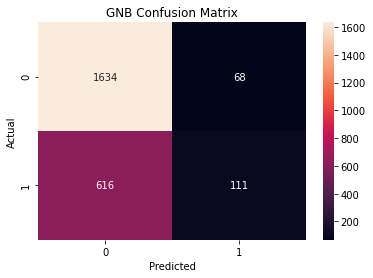

In [29]:
import matplotlib.pyplot as plt
sns.heatmap(metrics.confusion_matrix(gnby_test, y_pred_gnb), annot=True, fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual'); 
plt.title('GNB Confusion Matrix')

In [30]:
print(metrics.f1_score(gnby_test, y_pred_gnb))

0.24503311258278143


In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver = 'lbfgs', max_iter=400)
logreg.fit(sm_X,sm_y.values.ravel())
y_pred = logreg.predict(X_test)
log_accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.5f}'.format(log_accuracy))

Accuracy: 0.73240


In [60]:
coefficients = pd.concat([pd.DataFrame(sm_X.columns),pd.DataFrame(np.transpose(logreg.coef_))], axis = 1)
cols = ['Variable', 'Coefficient']
coefficients.columns = cols
coefficients['Absolute Value'] = abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values(by='Absolute Value', ascending=False).reset_index()
coefficients = coefficients.drop('index',axis=1)
print(coefficients.to_string())

                              Variable  Coefficient  Absolute Value
0                         Party Code_D     1.585492        1.585492
1                       Voter Status_A     1.411765        1.411765
2                       Voter Status_I    -1.411765        1.411765
3                        Party Code_NF     1.134400        1.134400
4                         Party Code_R     0.996612        0.996612
5                2016 GENERAL ELECTION    -0.663095        0.663095
6                       Party Code_NON     0.572930        0.572930
7                 2020 GENERAL PRIMARY     0.437570        0.437570
8                2018 GENERAL ELECTION     0.350755        0.350755
9                 2016 GENERAL PRIMARY    -0.337980        0.337980
10                        Party Code_I     0.316356        0.316356
11                  Precinct Code_2711     0.314494        0.314494
12                            Gender_M     0.310984        0.310984
13                            Gender_F     0.297

In [32]:
print(metrics.f1_score(y_test, y_pred))

0.656448202959831


Text(0.5, 1.0, 'Logit Confusion Matrix')

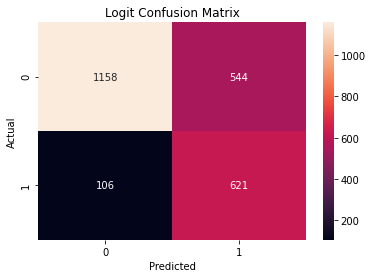

In [33]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual'); 
plt.title('Logit Confusion Matrix')

In [34]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

rfe = RFE(clf, n_features_to_select=20)
rfe = rfe.fit(sm_X, sm_y.values.ravel())
relevant_ind = [ind for ind,x in enumerate(rfe.ranking_) if x == 1]
significant = [x for ind,x in enumerate(sm_X.columns.to_list()) if ind in relevant_ind]
clf_X = X[significant]
clf_y = y['2020 GENERAL ELECTION']

clfX_train, clfX_test, clfy_train, clfy_test = train_test_split(clf_X, clf_y, test_size=0.3, random_state=42)

clf.fit(clfX_train,clfy_train)
y_pred_clf = clf.predict(clfX_test)
clf_accuracy = metrics.accuracy_score(clfy_test, y_pred_clf)
print('Accuracy: {:.5f}'.format(clf_accuracy))

data_ps_clf = clfX_test.assign(propensity_score=clf.predict_proba(clfX_test)[:, 1],vote_2020=clfy_test)
data_ps_clf = data_ps_clf.reset_index()
scores_clf = data_ps_clf['propensity_score'].to_list()

Accuracy: 0.78345


In [35]:
print(metrics.f1_score(clfy_test, y_pred_clf))

0.6316526610644257


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

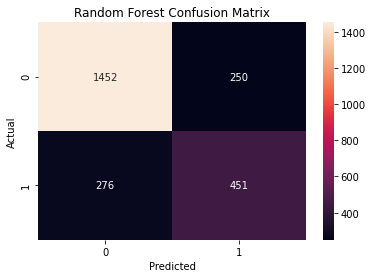

In [36]:
sns.heatmap(metrics.confusion_matrix(clfy_test, y_pred_clf), annot=True, fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual'); 
plt.title('Random Forest Confusion Matrix')

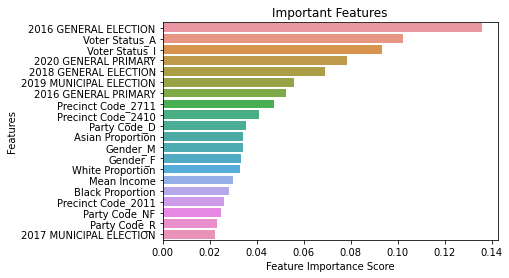

In [62]:
import matplotlib.pyplot as plt

pred_features = pd.Series(clf.feature_importances_,index=clf_X.columns).sort_values(ascending=False)
sns.barplot(x=pred_features, y=pred_features.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.show()

In [38]:
from imblearn.ensemble import BalancedRandomForestClassifier

brfc = BalancedRandomForestClassifier(n_estimators=200)

bX_train, bX_test, by_train, by_test = train_test_split(sm_X, sm_y, test_size=0.3, random_state=42)

brfc.fit(bX_train, by_train.values.ravel())
by_pred = brfc.predict(bX_test)
b_accuracy = metrics.accuracy_score(by_test, by_pred)
print('Accuracy: {:.5f}'.format(b_accuracy))

data_ps_b = bX_test.assign(propensity_score=brfc.predict_proba(bX_test)[:, 1])
data_ps_b = data_ps_b.reset_index()
scores_b = data_ps_b['propensity_score'].to_list()

Accuracy: 0.81043


Text(0.5, 1.0, 'Balanced Random Forest Confusion Matrix')

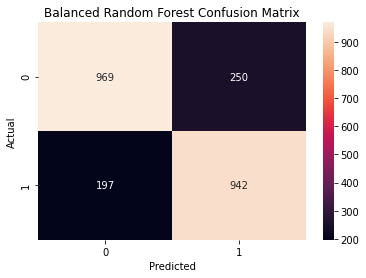

In [39]:
sns.heatmap(metrics.confusion_matrix(by_test, by_pred), annot=True, fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual'); 
plt.title('Balanced Random Forest Confusion Matrix')

In [40]:
print(metrics.f1_score(by_test, by_pred))

0.8082368082368083


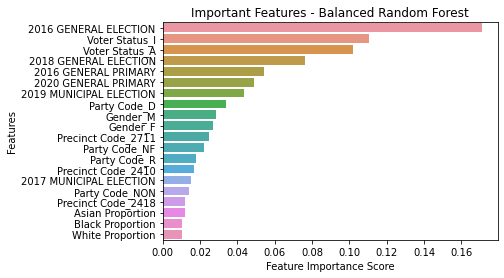

In [65]:
import matplotlib.pyplot as plt

pred_features = pd.Series(brfc.feature_importances_,index=sm_X.columns).sort_values(ascending=False)
pred_features = pred_features[:20]
sns.barplot(x=pred_features, y=pred_features.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features - Balanced Random Forest")
plt.show()

In [41]:
data_ps_b = data_ps_b.rename(columns={"index": "Original Index"})
columns = ['Original Index', 'propensity_score']
data_ps_b = data_ps_b[columns]
og_ix = data_ps_b['Original Index'].to_list()
final = student_voters.merge(data_ps_b, left_index=True, right_on='Original Index')
final = final[['ID Number', 'propensity_score']]

In [42]:
final.head(15)

,ID Number,propensity_score
1517,102880067-51,0.462592
1529,102928664-51,0.762401
1524,103123818-51,0.494776
2070,103148970-51,0.254121
698,103164561-51,0.480241
613,103191638-51,0.000000
77,103191815-51,0.891097
955,103191870-51,0.390342
2204,103192248-51,0.516679
919,103193186-51,0.655976


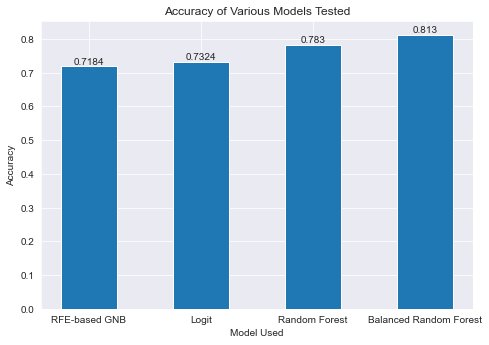

In [337]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['RFE-based GNB', 'Logit', 'Random Forest', 'Balanced Random Forest']
accuracy = [gnb_accuracy, log_accuracy, clf_accuracy, b_accuracy]
ax.bar(models,accuracy, width=0.5)
plt.xlabel('Model Used')
plt.ylabel('Accuracy')
plt.title('Accuracy of Various Models Tested')

bars = ax.patches
for bar, acc in zip(bars, accuracy):
    acc = round(acc, 4) 
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), acc,
            ha='center', va='bottom')

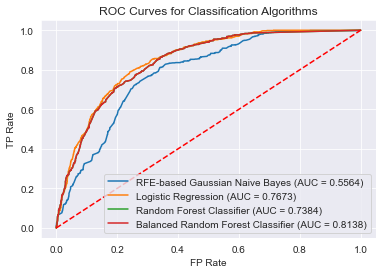

In [336]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 

gnb_roc_auc = roc_auc_score(gnby_test, y_pred_gnb)
logit_roc_auc = roc_auc_score(y_test, y_pred)
rf_roc_auc = roc_auc_score(clfy_test, y_pred_clf)
b_roc_auc = roc_auc_score(by_test, by_pred)


fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
fpr2, tpr2, thresholds2 = roc_curve(gnby_test, gnb.predict_proba(gnbX_test)[:,1])
fpr3, tpr3, thresholds3 = roc_curve(clfy_test, clf.predict_proba(clfX_test)[:,1])
fpr4, tpr4, thresholds4 = roc_curve(by_test, brfc.predict_proba(bX_test)[:,1])


plt.figure()
plt.plot(fpr2, tpr2, label='RFE-based Gaussian Naive Bayes (AUC = %0.4f)' % gnb_roc_auc)
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.4f)' % logit_roc_auc)
plt.plot(fpr3, tpr3, label='Random Forest Classifier (AUC = %0.4f)' % rf_roc_auc)
plt.plot(fpr3, tpr3, label='Balanced Random Forest Classifier (AUC = %0.4f)' % b_roc_auc)


plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC Curves for Classification Algorithms')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()